In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

# DEEP2

In [2]:
# path                                  =  './models/CMA_ES/DEEP2/'
# path_a                                = [path]
# RD                                    = retrieve_data()
# df,dict_,path_best                    = RD.get_max_CMA(path)


# BO_vis                                = plotting_tool(dict_['dict_config'])

# df                                     = df[df['epoch'] < 150]
# array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
# array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
# array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

NameError: name 'array_AUC_tr_a' is not defined

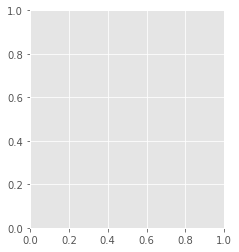

In [3]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


In [ ]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

In [ ]:
BO_vis.plot_cma(dict_)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [ ]:
dict_c = {
        'path'       :  path_best+'/',
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'/dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


In [ ]:
path_best+'/dict.p'

## experiments

In [2]:
path                                  =  './models/segmentated_shuffle/bayes_opt/DEEP2/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

str_list                              = data['path_o'].split('/')
data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

lr           : 0.001267345303142497
time_dim     : 20
encoder      : [240, 443]
decoder      : [470]
vector       : 240
AUC_v        : 0.7134902394733854


In [3]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## Min plus linear

In [4]:
dict_c = return_dict()
dict_c['mode']   = 'linear'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/min_pos_linear')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=612295, Sat May  5 17:18:28 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.519973668710808e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:43.9
    2     42 -7.538059106814954e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:49.5
    3     63 -7.604753490628141e-01 1.0e+00 4.03e-01  4e-01  4e-01 0:54.9
    4     84 -7.630634376190971e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:01.8
    5    105 -7.688978969615079e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:07.5
    6    126 -7.715587430274053e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:13.9
    7    147 -7.759103350310086e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:21.3
    8    168 -7.824065412465787e-01 1.0e+00 3.83e-01  4e-01  4e-01 1:26.7
    9    189 -7.820843294182863e-01 1.0e+00 3.80e-01  4e-01  4e-01 1:31.3
   10    210 -7.873367286837819e-01 1.0e+00 3.77e-01  4e-01  4e-01 1:36.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.900183

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.357031493607731e-01 1.2e+00 4.97e-01  5e-01  5e-01 14:13.2
  102   2142 -9.358555936666320e-01 1.2e+00 4.98e-01  5e-01  5e-01 14:17.8
  103   2163 -9.345598170668331e-01 1.2e+00 4.99e-01  5e-01  5e-01 14:22.2
  104   2184 -9.350968367806534e-01 1.2e+00 5.01e-01  5e-01  5e-01 14:26.0
  105   2205 -9.349894328378893e-01 1.2e+00 5.02e-01  5e-01  5e-01 14:30.0
  106   2226 -9.357066140040882e-01 1.2e+00 5.03e-01  5e-01  5e-01 14:34.9
  107   2247 -9.376849253369367e-01 1.2e+00 5.04e-01  5e-01  5e-01 14:39.3
  108   2268 -9.372864913557148e-01 1.2e+00 5.05e-01  5e-01  5e-01 14:43.2
  109   2289 -9.366524616290753e-01 1.2e+00 5.06e-01  5e-01  5e-01 14:47.4
  110   2310 -9.363129265842082e-01 1.2e+00 5.07e-01  5e-01  5e-01 14:51.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.360357551190104e-01 1.2e+00 5.08e-01  5e-01  5e-01 15:33.8
  112   2352 -9.376087031840072

In [5]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

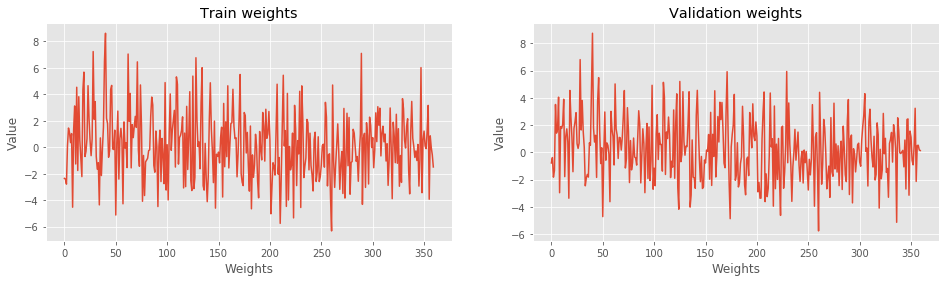

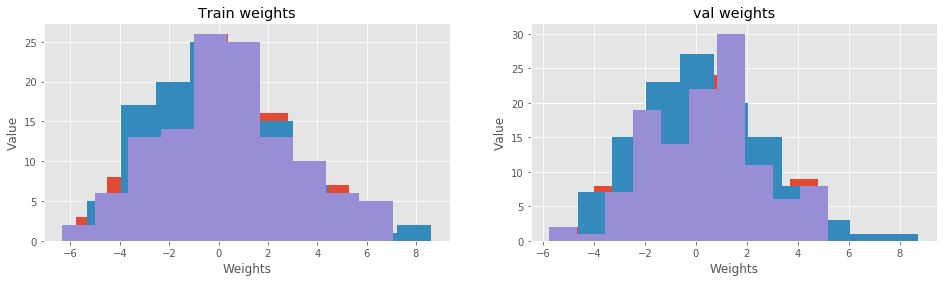

In [6]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

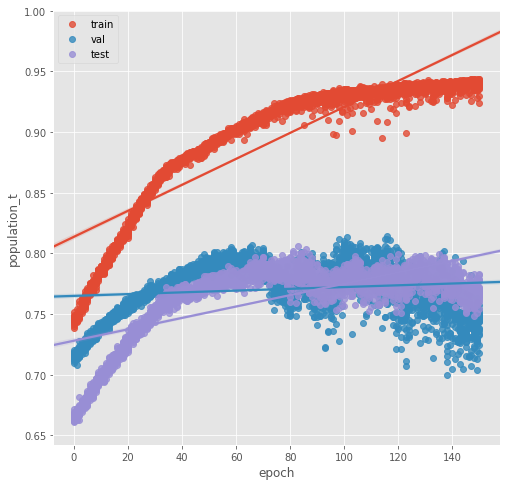

In [7]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

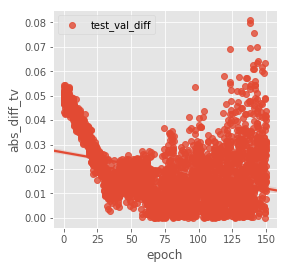

In [8]:
f, ax = plt.subplots(figsize=(4, 4))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()


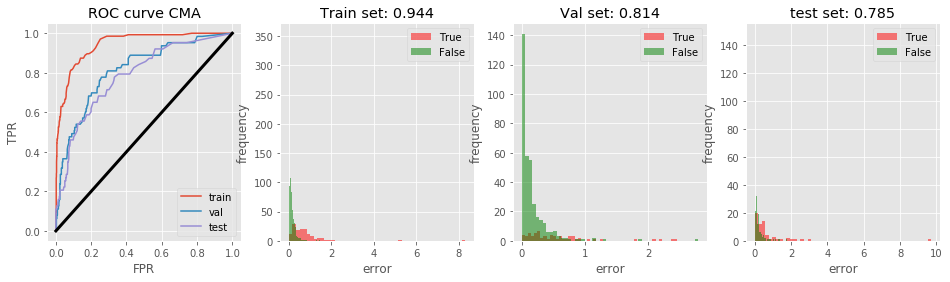

In [9]:
BO_vis.plot_cma(data)

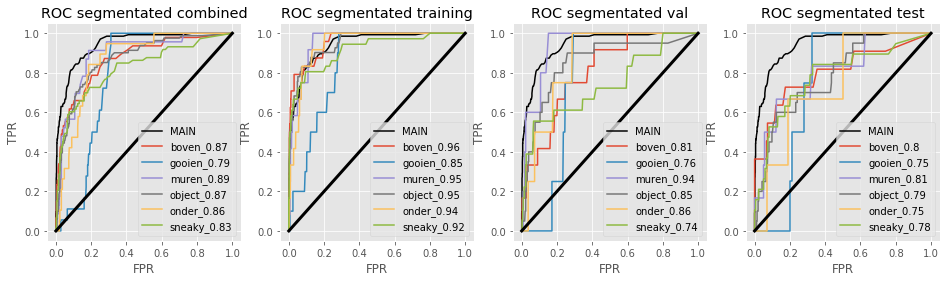

In [10]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

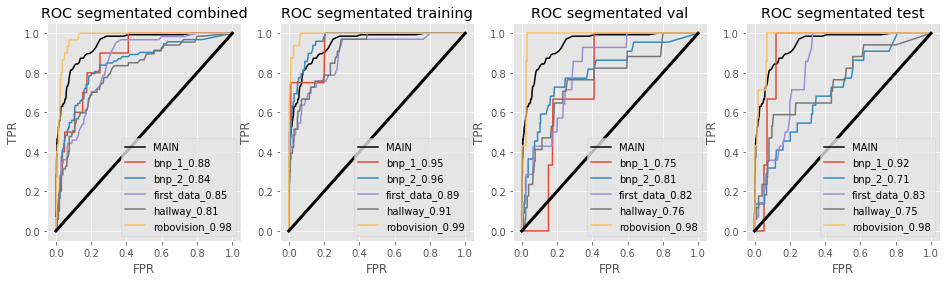

In [11]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus linear

In [12]:
dict_c = return_dict()
dict_c['mode']   = 'linear'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_linear')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=712052, Sat May  5 17:39:17 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.509579738765895e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:39.0
    2     42 -7.536500017323216e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:43.1
    3     63 -7.595398953677718e-01 1.0e+00 4.03e-01  4e-01  4e-01 0:47.2
    4     84 -7.623393271662682e-01 1.0e+00 3.98e-01  4e-01  4e-01 0:51.4
    5    105 -7.698853203062744e-01 1.0e+00 3.93e-01  4e-01  4e-01 0:55.8
    6    126 -7.694487752485881e-01 1.0e+00 3.89e-01  4e-01  4e-01 0:59.9
    7    147 -7.737276097425769e-01 1.0e+00 3.85e-01  4e-01  4e-01 1:04.1
    8    168 -7.762082943560960e-01 1.0e+00 3.82e-01  4e-01  4e-01 1:08.1
    9    189 -7.789003222118283e-01 1.0e+00 3.79e-01  4e-01  4e-01 1:12.3
   10    210 -7.807331185254478e-01 1.0e+00 3.76e-01  4e-01  4e-01 1:16.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.822367

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -8.298063264386931e-01 1.2e+00 3.65e-01  4e-01  4e-01 13:25.5
  102   2142 -8.317188095485570e-01 1.2e+00 3.66e-01  4e-01  4e-01 13:29.7
  103   2163 -8.329002529189619e-01 1.2e+00 3.66e-01  4e-01  4e-01 13:33.1
  104   2184 -8.320167688736444e-01 1.2e+00 3.66e-01  4e-01  4e-01 13:37.3
  105   2205 -8.317811731282264e-01 1.2e+00 3.66e-01  4e-01  4e-01 13:41.2
  106   2226 -8.313792745036898e-01 1.2e+00 3.67e-01  4e-01  4e-01 13:45.3
  107   2247 -8.320895263832586e-01 1.2e+00 3.67e-01  4e-01  4e-01 13:49.1
  108   2268 -8.316633752555175e-01 1.2e+00 3.67e-01  4e-01  4e-01 13:52.9
  109   2289 -8.312787998475557e-01 1.2e+00 3.67e-01  4e-01  4e-01 13:56.5
  110   2310 -8.319093649308804e-01 1.2e+00 3.66e-01  4e-01  4e-01 14:00.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -8.326334753837092e-01 1.2e+00 3.66e-01  4e-01  4e-01 14:39.4
  112   2352 -8.331878183141045

In [13]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

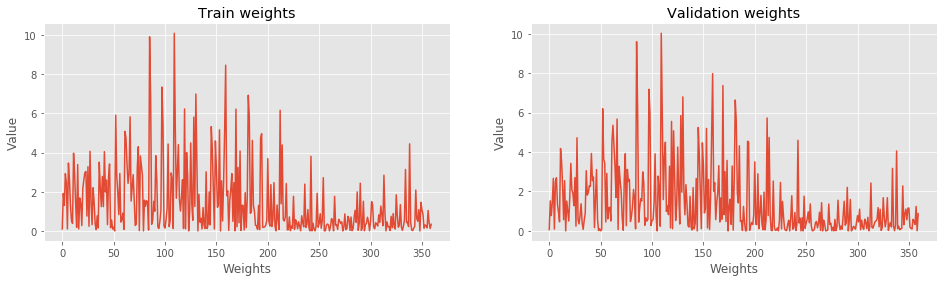

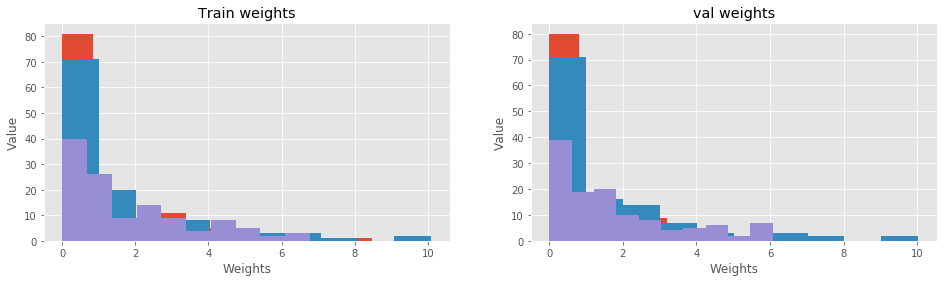

In [14]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

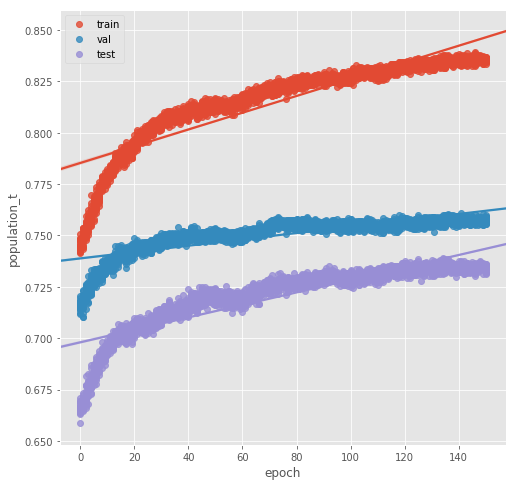

In [15]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

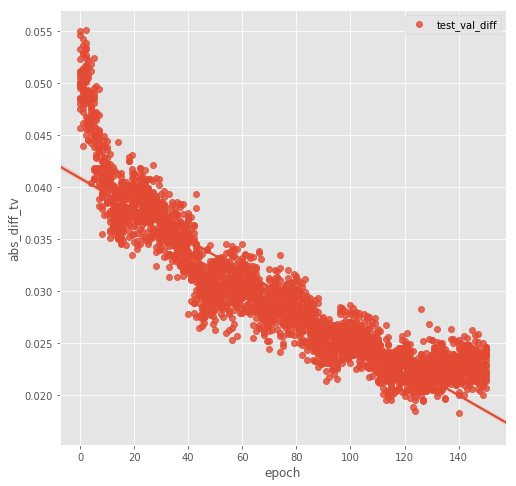

In [16]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

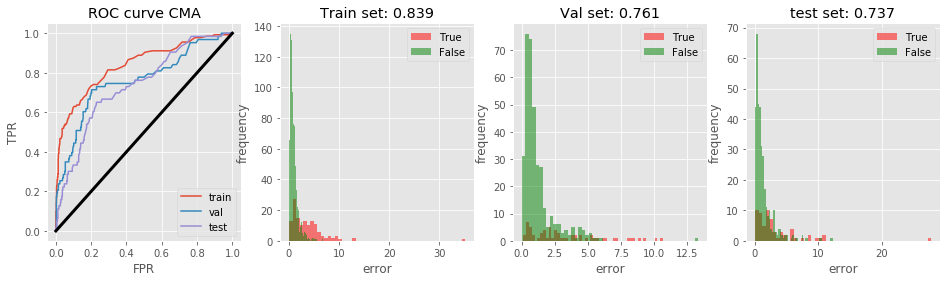

In [17]:
BO_vis.plot_cma(data)

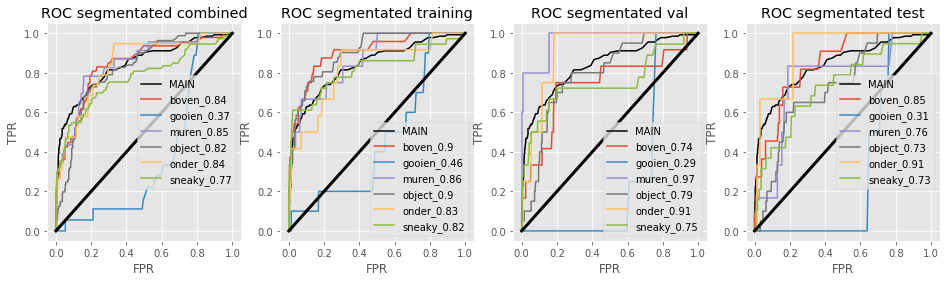

In [18]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

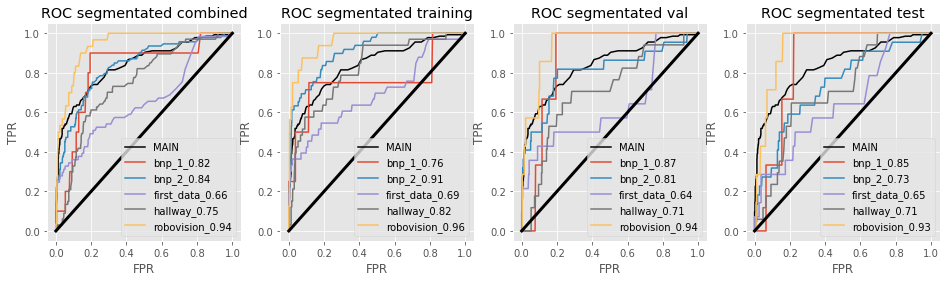

In [19]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min sigmoid

In [22]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=573150, Sat May  5 18:07:49 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.509787617364792e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:42.1
    2     42 -7.537435471018259e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:47.1
    3     63 -7.606555105151924e-01 1.0e+00 4.03e-01  4e-01  4e-01 0:53.0
    4     84 -7.633475383709247e-01 1.0e+00 3.99e-01  4e-01  4e-01 0:59.6
    5    105 -7.681911097252538e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:04.3
    6    126 -7.680733118525449e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:11.2
    7    147 -7.739839933478848e-01 1.0e+00 3.87e-01  4e-01  4e-01 1:17.9
    8    168 -7.748813359664621e-01 1.0e+00 3.83e-01  4e-01  4e-01 1:25.3
    9    189 -7.816928247236948e-01 1.0e+00 3.80e-01  4e-01  4e-01 1:32.4
   10    210 -7.846516301146796e-01 1.0e+00 3.78e-01  4e-01  4e-01 1:39.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.872466

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.299795586044417e-01 1.2e+00 4.88e-01  5e-01  5e-01 16:09.6
  102   2142 -9.315836884592732e-01 1.2e+00 4.90e-01  5e-01  5e-01 16:14.9
  103   2163 -9.308872951529640e-01 1.2e+00 4.92e-01  5e-01  5e-01 16:19.8
  104   2184 -9.310570626753977e-01 1.2e+00 4.94e-01  5e-01  5e-01 16:26.5
  105   2205 -9.311332848283270e-01 1.2e+00 4.96e-01  5e-01  5e-01 16:32.1
  106   2226 -9.316321934656827e-01 1.2e+00 4.98e-01  5e-01  5e-01 16:36.7
  107   2247 -9.310813151786024e-01 1.2e+00 5.00e-01  5e-01  5e-01 16:41.5
  108   2268 -9.316910924020372e-01 1.2e+00 5.02e-01  5e-01  5e-01 16:46.5
  109   2289 -9.318677892111007e-01 1.2e+00 5.04e-01  5e-01  5e-01 16:51.3
  110   2310 -9.316044763191630e-01 1.2e+00 5.05e-01  5e-01  5e-01 16:56.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.350656549908186e-01 1.2e+00 5.07e-01  5e-01  5e-01 17:38.2
  112   2352 -9.342583930984304

In [23]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

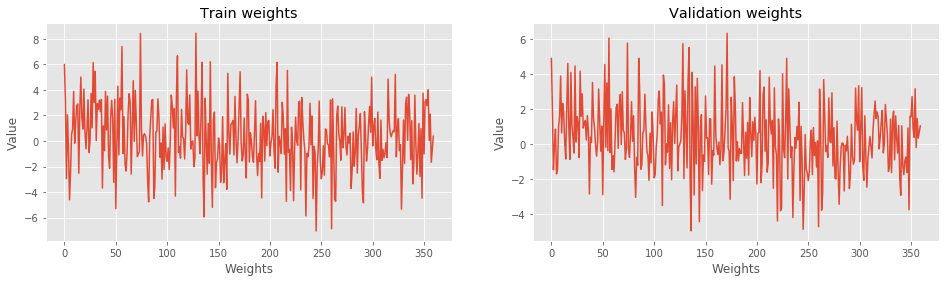

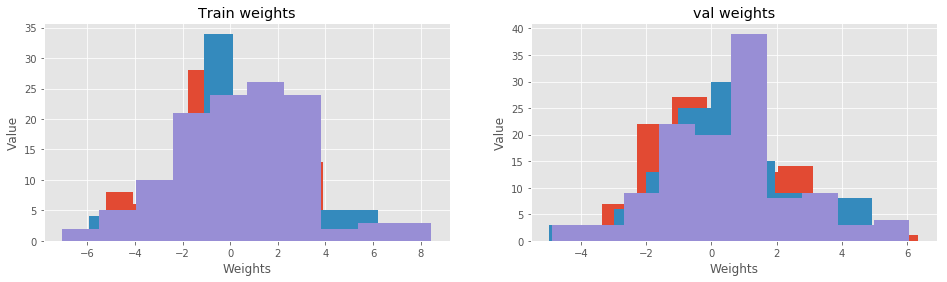

In [24]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

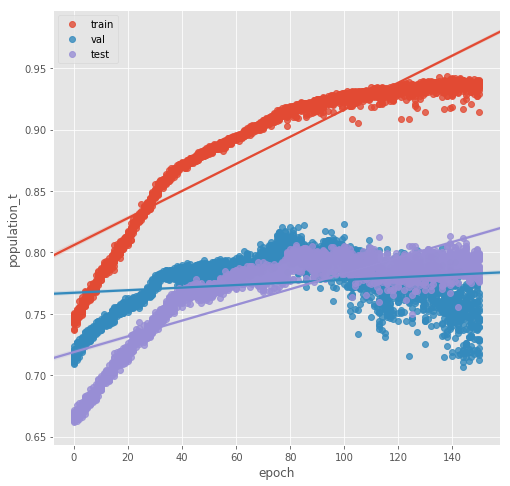

In [25]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

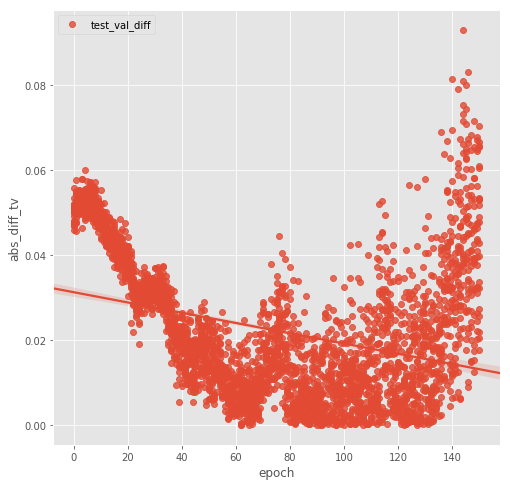

In [26]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

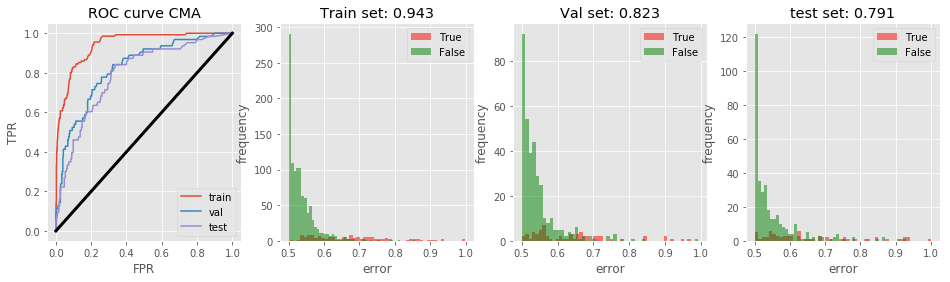

In [27]:
BO_vis.plot_cma(data)

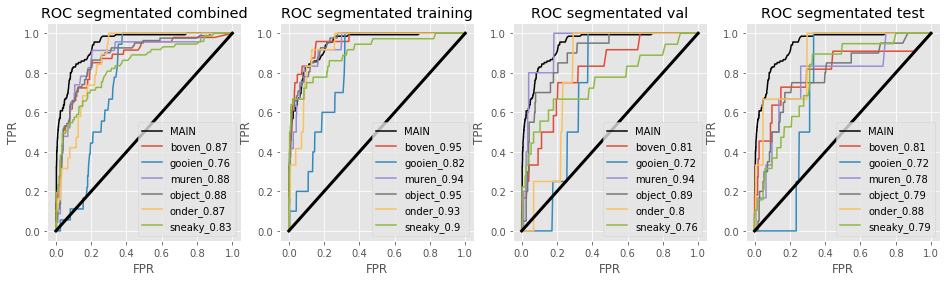

In [28]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

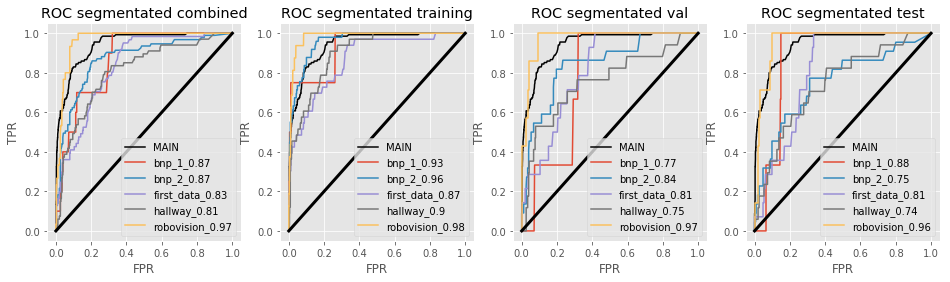

In [29]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min relu

In [30]:
dict_c = return_dict()
dict_c['mode']   = 'relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=654011, Sat May  5 18:32:04 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.546928593701279e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:42.3
    2     42 -7.547552229497975e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:50.8
    3     63 -7.601704604510966e-01 1.0e+00 4.03e-01  4e-01  4e-01 0:58.5
    4     84 -7.648165471364723e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:05.4
    5    105 -7.673873124761806e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:13.2
    6    126 -7.691092402037212e-01 1.0e+00 3.89e-01  4e-01  4e-01 1:20.2
    7    147 -7.718982780722726e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:26.2
    8    168 -7.778470706440772e-01 1.0e+00 3.82e-01  4e-01  4e-01 1:31.8
    9    189 -7.787894536257493e-01 1.0e+00 3.79e-01  4e-01  4e-01 1:37.4
   10    210 -7.860998510203374e-01 1.0e+00 3.76e-01  4e-01  4e-01 1:44.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.877524

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.312406887710910e-01 1.2e+00 4.88e-01  5e-01  5e-01 15:49.3
  102   2142 -9.310432041021376e-01 1.2e+00 4.89e-01  5e-01  5e-01 15:53.9
  103   2163 -9.313376987839103e-01 1.2e+00 4.90e-01  5e-01  5e-01 15:58.7
  104   2184 -9.327616671863632e-01 1.2e+00 4.92e-01  5e-01  5e-01 16:02.9
  105   2205 -9.326473339569692e-01 1.2e+00 4.93e-01  5e-01  5e-01 16:07.3
  106   2226 -9.345113120604234e-01 1.2e+00 4.94e-01  5e-01  5e-01 16:12.5
  107   2247 -9.340643730727921e-01 1.2e+00 4.96e-01  5e-01  5e-01 16:18.1
  108   2268 -9.337768076776496e-01 1.2e+00 4.97e-01  5e-01  5e-01 16:23.2
  109   2289 -9.331427779510099e-01 1.2e+00 4.98e-01  5e-01  5e-01 16:28.3
  110   2310 -9.351314832138031e-01 1.2e+00 5.00e-01  5e-01  5e-01 16:33.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.352908568062918e-01 1.2e+00 5.01e-01  5e-01  5e-01 17:09.6
  112   2352 -9.350725842774485

In [31]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

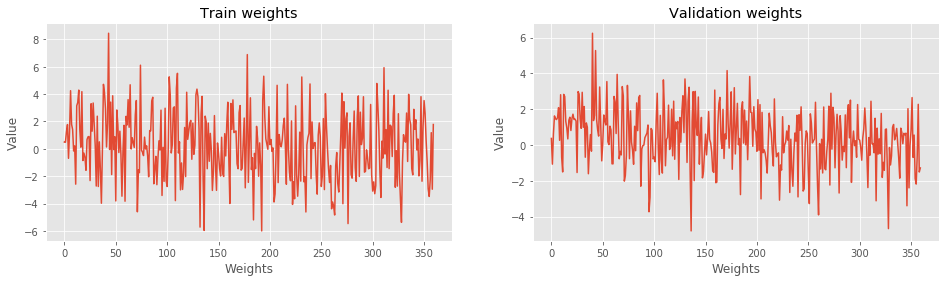

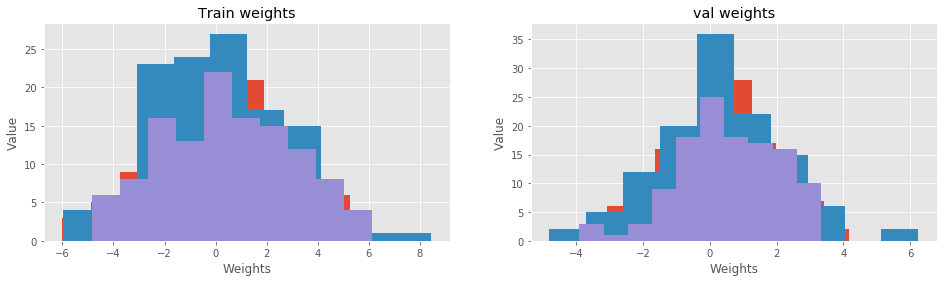

In [32]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

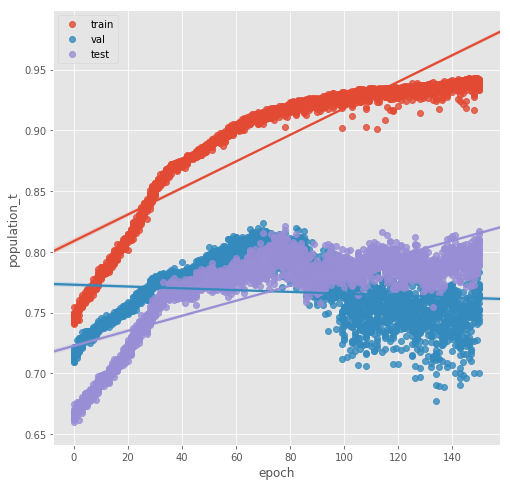

In [33]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

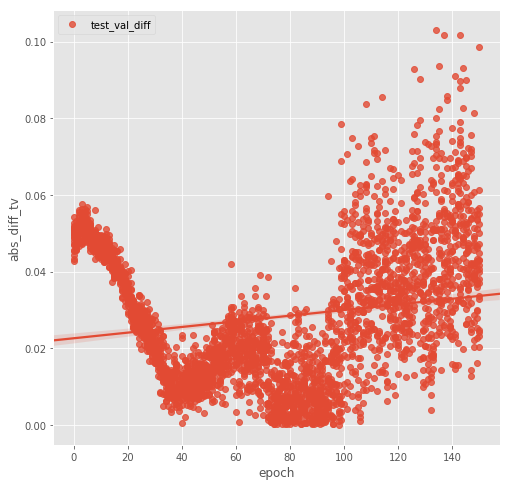

In [34]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

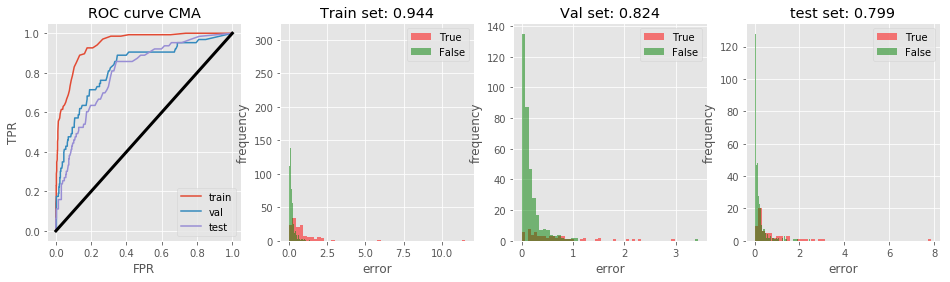

In [35]:
BO_vis.plot_cma(data)

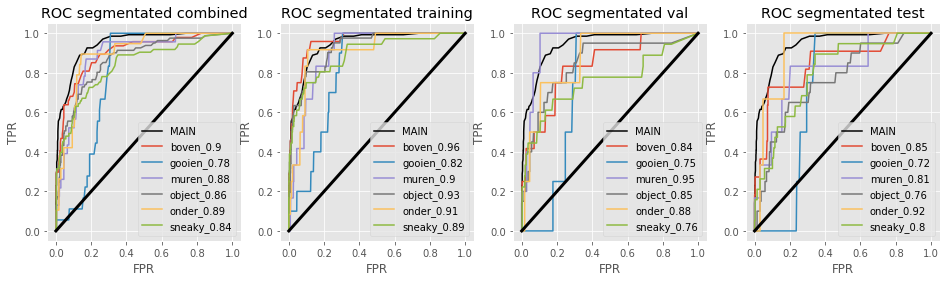

In [36]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

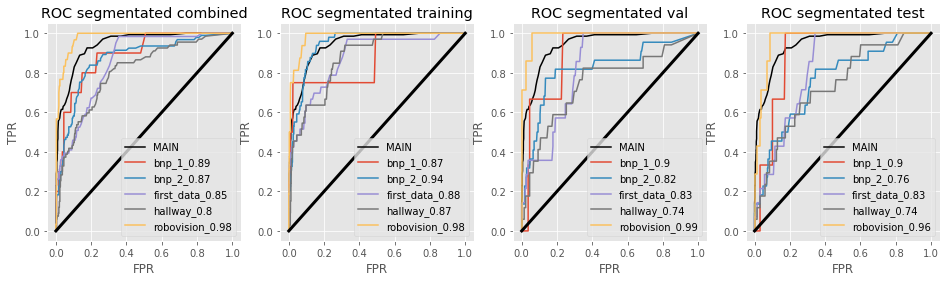

In [37]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu

In [9]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=874251, Mon May  7 12:02:30 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.501507119842012e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:52.8
    2     42 -7.552818487336730e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:00.4
    3     63 -7.578145029969164e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:08.1
    4     84 -7.604510965596092e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:17.3
    5    105 -7.634999826767835e-01 1.0e+00 3.93e-01  4e-01  4e-01 1:24.5
    6    126 -7.683089075979629e-01 1.0e+00 3.89e-01  4e-01  4e-01 1:32.3
    7    147 -7.725184492256523e-01 1.0e+00 3.85e-01  4e-01  4e-01 1:39.3
    8    168 -7.755915878460313e-01 1.0e+00 3.82e-01  4e-01  4e-01 1:46.9
    9    189 -7.785781103835360e-01 1.0e+00 3.79e-01  4e-01  4e-01 1:53.8
   10    210 -7.846273776114751e-01 1.0e+00 3.76e-01  4e-01  4e-01 2:01.8
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.903024

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.311471434015869e-01 1.2e+00 4.78e-01  5e-01  5e-01 20:56.5
  102   2142 -9.301146796937256e-01 1.2e+00 4.80e-01  5e-01  5e-01 21:05.4
  103   2163 -9.316668398988324e-01 1.2e+00 4.81e-01  5e-01  5e-01 21:12.5
  104   2184 -9.320583445934242e-01 1.2e+00 4.82e-01  5e-01  5e-01 21:19.5
  105   2205 -9.325607178740949e-01 1.2e+00 4.83e-01  5e-01  5e-01 21:28.1
  106   2226 -9.326057582371895e-01 1.2e+00 4.84e-01  5e-01  5e-01 21:36.0
  107   2247 -9.330596265114507e-01 1.2e+00 4.85e-01  5e-01  5e-01 21:44.9
  108   2268 -9.330873436579704e-01 1.2e+00 4.85e-01  5e-01  5e-01 21:53.7
  109   2289 -9.336694037348855e-01 1.2e+00 4.86e-01  5e-01  5e-01 22:01.4
  110   2310 -9.341891002321310e-01 1.2e+00 4.87e-01  5e-01  5e-01 22:11.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.346048574299276e-01 1.2e+00 4.87e-01  5e-01  5e-01 23:08.4
  112   2352 -9.349582510480545

In [10]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

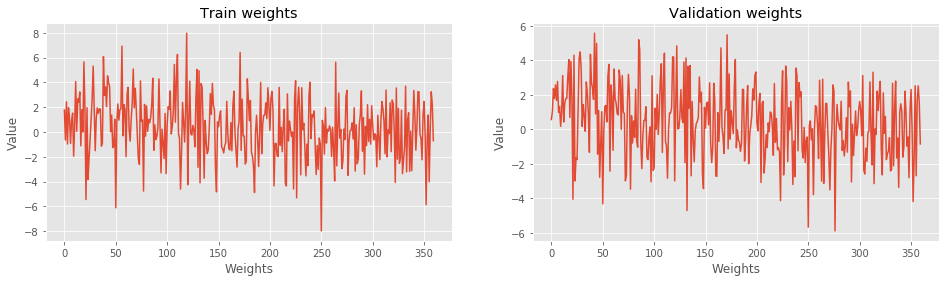

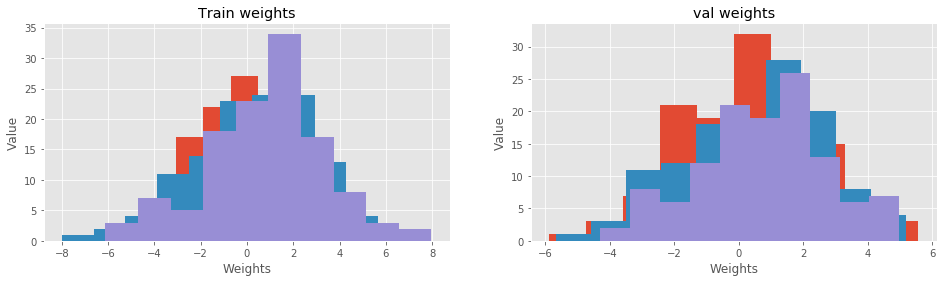

In [11]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

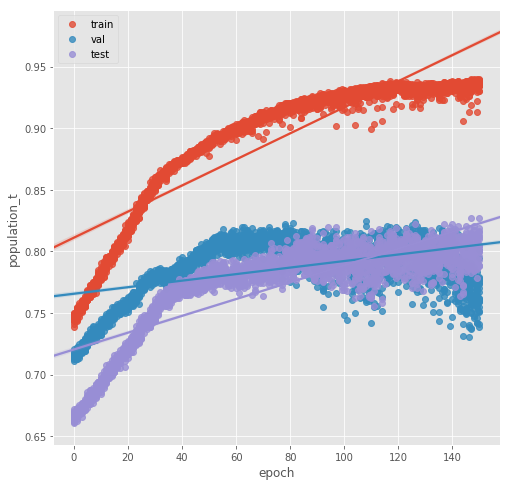

In [12]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

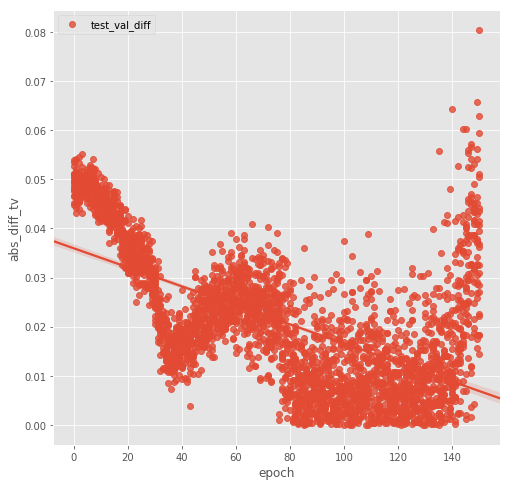

In [13]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

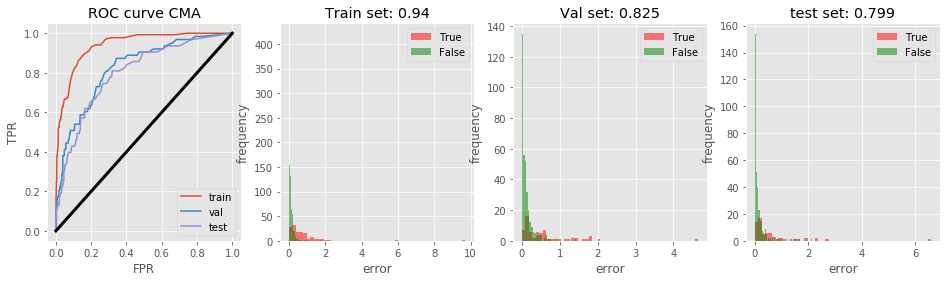

In [14]:
BO_vis.plot_cma(data)

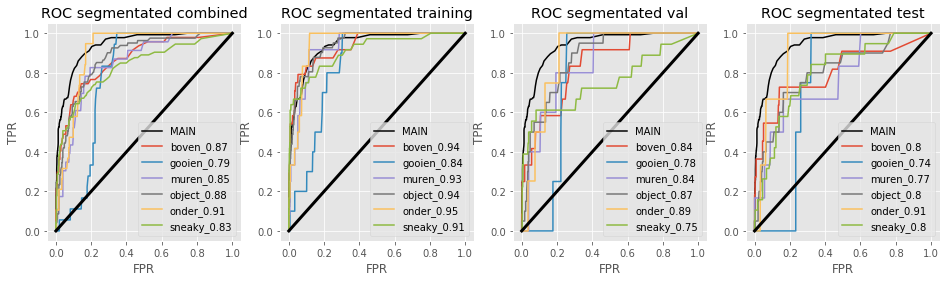

In [15]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

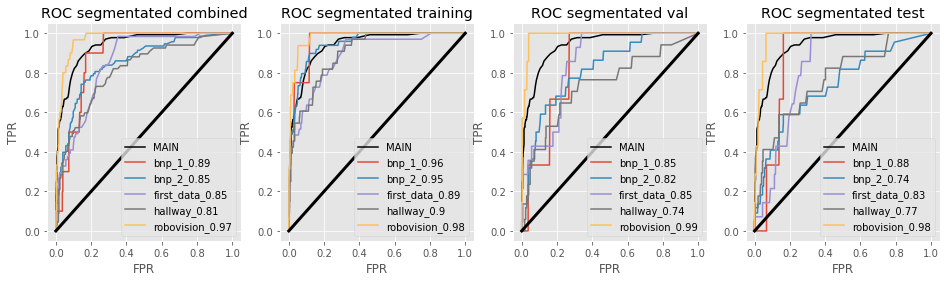

In [16]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu C

In [17]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu_C'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu_C')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 362 (seed=806636, Mon May  7 12:33:49 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.502650452135953e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:50.0
    2     42 -7.589093302844473e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:57.5
    3     63 -7.621522364272598e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:04.4
    4     84 -7.642344870595572e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:11.9
    5    105 -7.686692305027196e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:20.5
    6    126 -7.688320687385234e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:28.3
    7    147 -7.731282264490871e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:37.2
    8    168 -7.764057790250494e-01 1.0e+00 3.83e-01  4e-01  4e-01 1:45.3
    9    189 -7.822159858642552e-01 1.0e+00 3.80e-01  4e-01  4e-01 1:52.8
   10    210 -7.855212555867374e-01 1.0e+00 3.77e-01  4e-01  4e-01 2:00.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.888819

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.305754772546168e-01 1.2e+00 4.74e-01  5e-01  5e-01 20:48.5
  102   2142 -9.309600526625783e-01 1.2e+00 4.76e-01  5e-01  5e-01 20:55.4
  103   2163 -9.312753352042407e-01 1.2e+00 4.77e-01  5e-01  5e-01 21:02.5
  104   2184 -9.311713959047917e-01 1.2e+00 4.79e-01  5e-01  5e-01 21:10.8
  105   2205 -9.305061843883173e-01 1.2e+00 4.80e-01  5e-01  5e-01 21:18.1
  106   2226 -9.314069916502095e-01 1.2e+00 4.82e-01  5e-01  5e-01 21:27.2
  107   2247 -9.304091743754981e-01 1.2e+00 4.83e-01  5e-01  5e-01 21:34.9
  108   2268 -9.313515573571701e-01 1.2e+00 4.85e-01  5e-01  5e-01 21:43.2
  109   2289 -9.310293455288777e-01 1.2e+00 4.86e-01  5e-01  5e-01 21:53.0
  110   2310 -9.317430620517617e-01 1.2e+00 4.88e-01  5e-01  5e-01 22:01.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.321969303260231e-01 1.2e+00 4.89e-01  5e-01  5e-01 22:50.5
  112   2352 -9.318643245677858

In [18]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

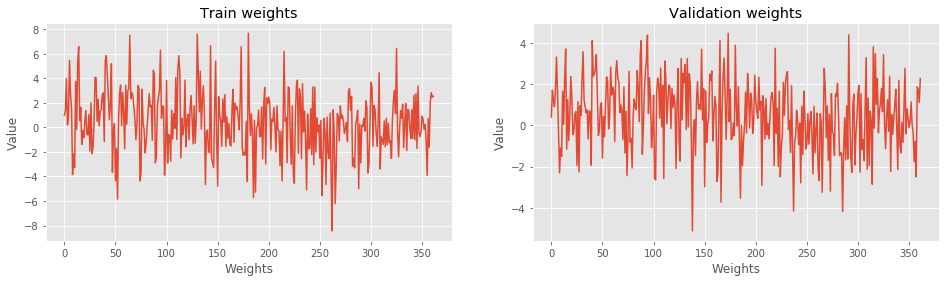

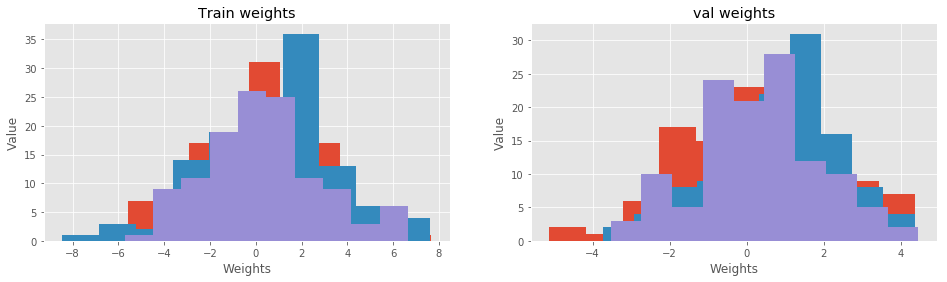

In [19]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

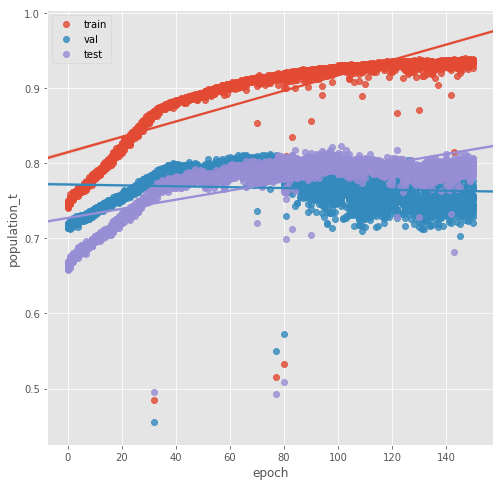

In [20]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

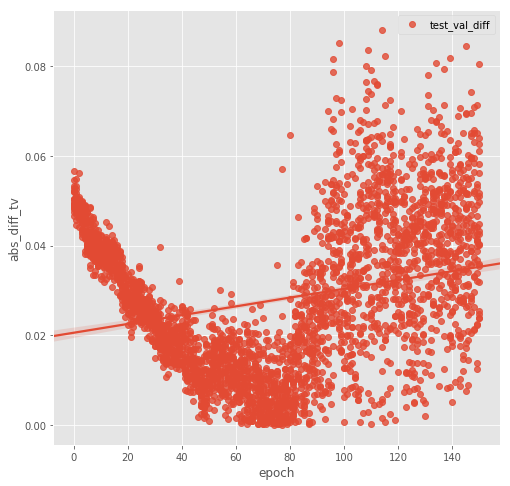

In [21]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

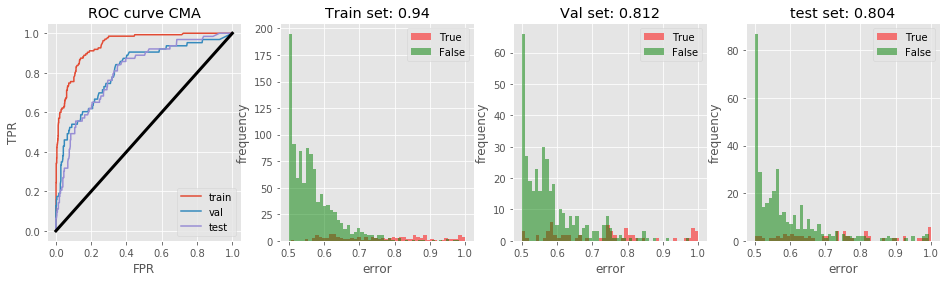

In [22]:
BO_vis.plot_cma(data)

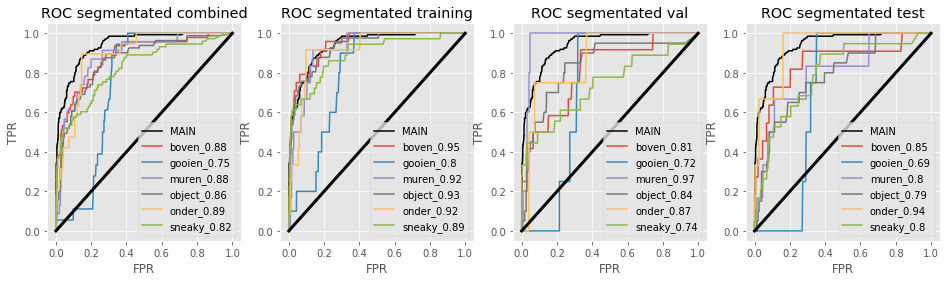

In [23]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

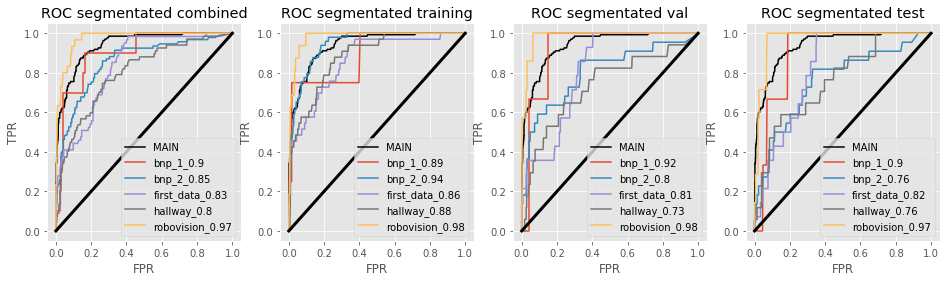

In [24]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [54]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=553579, Sat May  5 19:39:14 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.522121747566088e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:36.2
    2     42 -7.551536569310190e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:41.6
    3     63 -7.562207670720300e-01 1.0e+00 4.03e-01  4e-01  4e-01 0:47.7
    4     84 -7.608322073242560e-01 1.0e+00 3.98e-01  4e-01  4e-01 0:53.7
    5    105 -7.642275577729274e-01 1.0e+00 3.94e-01  4e-01  4e-01 0:59.4
    6    126 -7.649308803658664e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:05.1
    7    147 -7.695908256245021e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:10.7
    8    168 -7.685306447701210e-01 1.0e+00 3.83e-01  4e-01  4e-01 1:15.7
    9    189 -7.742022658767279e-01 1.0e+00 3.80e-01  4e-01  4e-01 1:20.9
   10    210 -7.773897377265010e-01 1.0e+00 3.77e-01  4e-01  4e-01 1:26.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.770744

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -8.312025776946262e-01 1.2e+00 3.77e-01  4e-01  4e-01 14:44.9
  102   2142 -8.315386480961785e-01 1.2e+00 3.78e-01  4e-01  4e-01 14:48.9
  103   2163 -8.317084156186121e-01 1.2e+00 3.78e-01  4e-01  4e-01 14:52.9
  104   2184 -8.315525066694385e-01 1.2e+00 3.79e-01  4e-01  4e-01 14:56.3
  105   2205 -8.315247895229186e-01 1.2e+00 3.80e-01  4e-01  4e-01 15:00.3
  106   2226 -8.319578699372900e-01 1.2e+00 3.80e-01  4e-01  4e-01 15:03.6
  107   2247 -8.331635658108998e-01 1.2e+00 3.80e-01  4e-01  4e-01 15:07.3
  108   2268 -8.324429200013859e-01 1.2e+00 3.81e-01  4e-01  4e-01 15:11.1
  109   2289 -8.328656064858123e-01 1.2e+00 3.81e-01  4e-01  4e-01 15:15.1
  110   2310 -8.335031008557670e-01 1.2e+00 3.81e-01  4e-01  4e-01 15:18.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -8.338391712573191e-01 1.2e+00 3.82e-01  4e-01  4e-01 15:49.8
  112   2352 -8.321276374597235

In [55]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

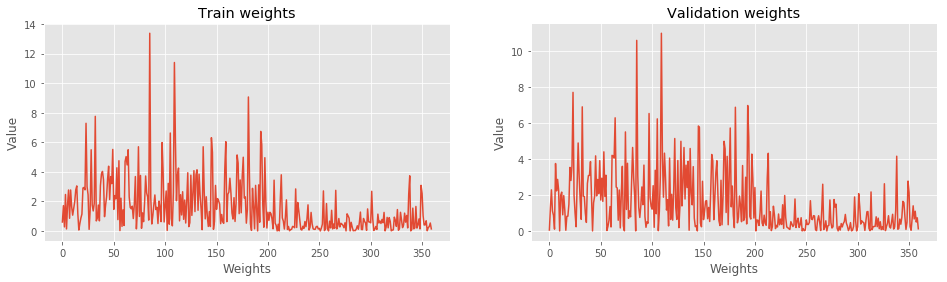

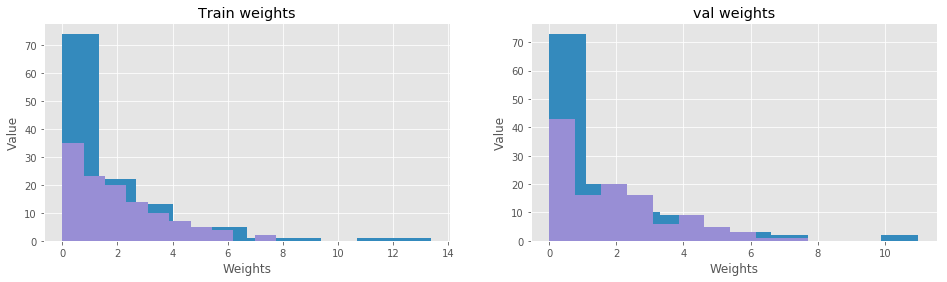

In [56]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

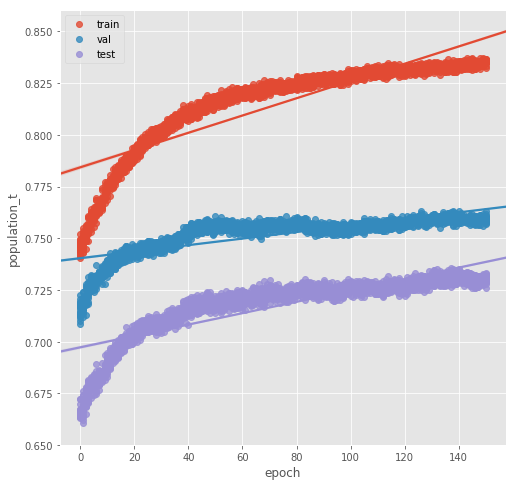

In [57]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

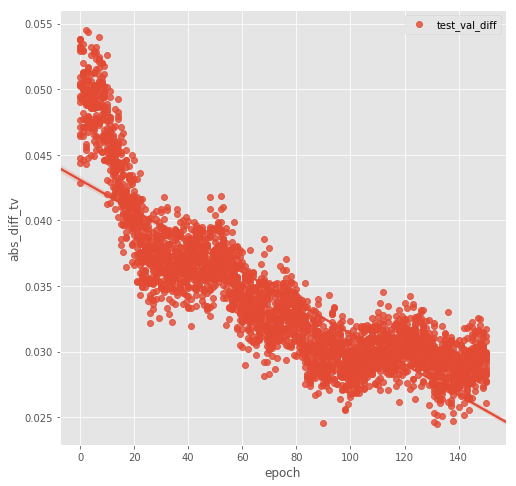

In [58]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

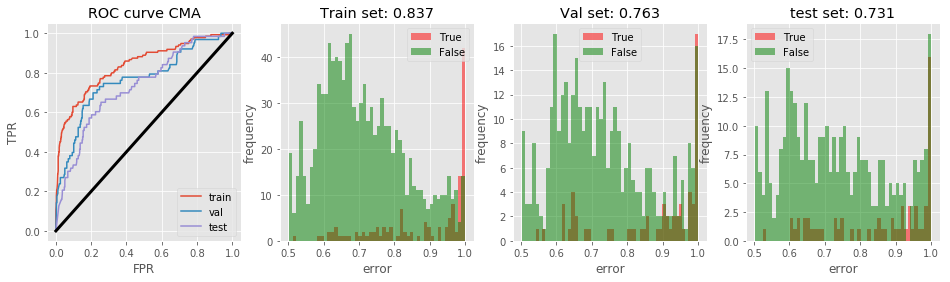

In [59]:
BO_vis.plot_cma(data)

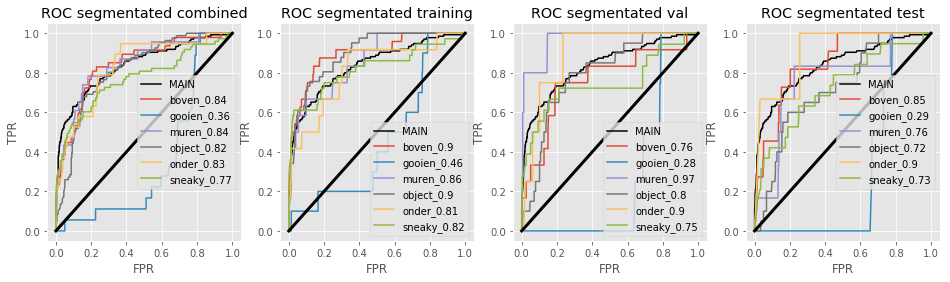

In [60]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

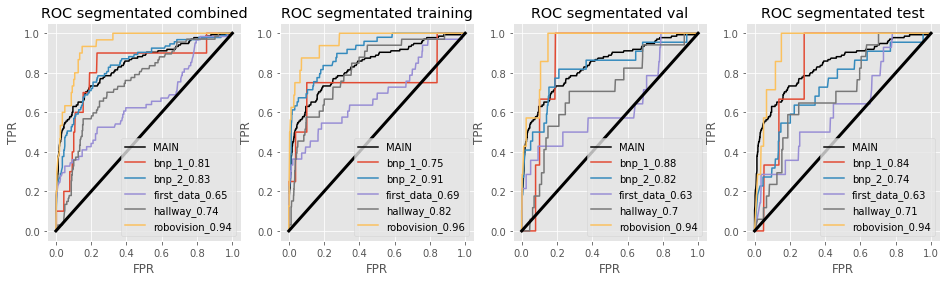

In [61]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid FL

In [4]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid_FL'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid_FL')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=780118, Mon May  7 10:07:50 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.550912933513494e-01 1.0e+00 4.15e-01  4e-01  4e-01 1:20.9
    2     42 -7.574645740221043e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:38.7
    3     63 -7.588573606347225e-01 1.0e+00 4.04e-01  4e-01  4e-01 1:54.7
    4     84 -7.616879742230539e-01 1.0e+00 3.98e-01  4e-01  4e-01 2:12.8
    5    105 -7.676333021515436e-01 1.0e+00 3.94e-01  4e-01  4e-01 2:33.3
    6    126 -7.661712226726258e-01 1.0e+00 3.90e-01  4e-01  4e-01 2:51.0
    7    147 -7.725392370855421e-01 1.0e+00 3.86e-01  4e-01  4e-01 3:07.4
    8    168 -7.758063957315594e-01 1.0e+00 3.82e-01  4e-01  4e-01 3:24.8
    9    189 -7.763399508020649e-01 1.0e+00 3.79e-01  4e-01  4e-01 3:43.2
   10    210 -7.788899282818833e-01 1.0e+00 3.76e-01  4e-01  4e-01 4:01.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.821224

  100   2100 -8.312753352042407e-01 1.1e+00 3.51e-01  4e-01  4e-01 44:32.2
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -8.311298201850119e-01 1.1e+00 3.51e-01  4e-01  4e-01 46:07.2
  102   2142 -8.320791324533139e-01 1.1e+00 3.51e-01  4e-01  4e-01 46:24.2
  103   2163 -8.315525066694384e-01 1.1e+00 3.51e-01  4e-01  4e-01 46:41.1
  104   2184 -8.308145376433497e-01 1.1e+00 3.51e-01  4e-01  4e-01 47:00.2
  105   2205 -8.324533139313308e-01 1.1e+00 3.51e-01  3e-01  4e-01 47:24.1
  106   2226 -8.315906177459030e-01 1.1e+00 3.50e-01  3e-01  4e-01 47:46.2
  107   2247 -8.319162942175102e-01 1.1e+00 3.50e-01  3e-01  4e-01 48:08.8
  108   2268 -8.327096975366387e-01 1.1e+00 3.50e-01  3e-01  4e-01 48:26.8
  109   2289 -8.320029103003845e-01 1.2e+00 3.50e-01  3e-01  4e-01 48:44.2
  110   2310 -8.328205661227176e-01 1.2e+00 3.50e-01  3e-01  4e-01 49:05.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -8.319301527907702

In [5]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

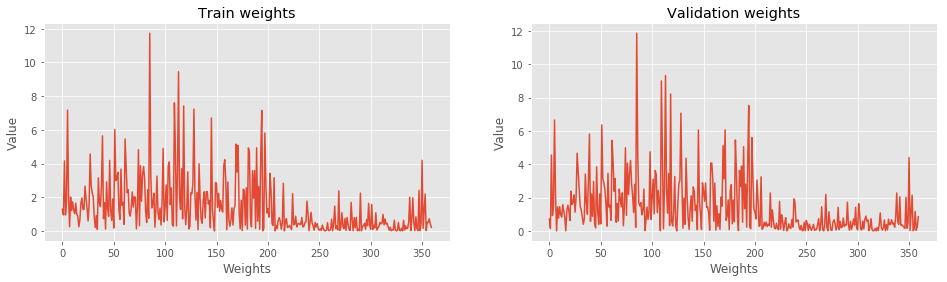

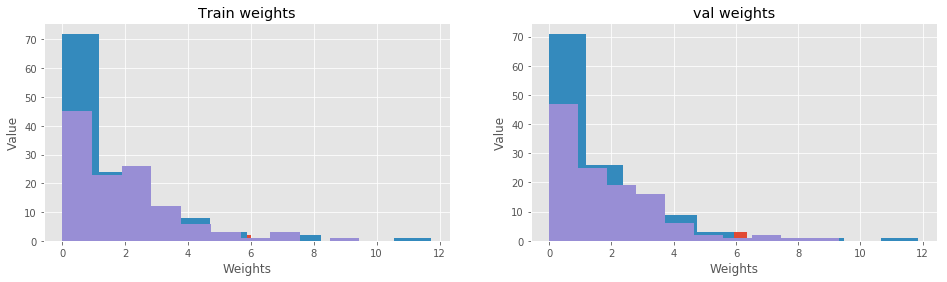

In [6]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

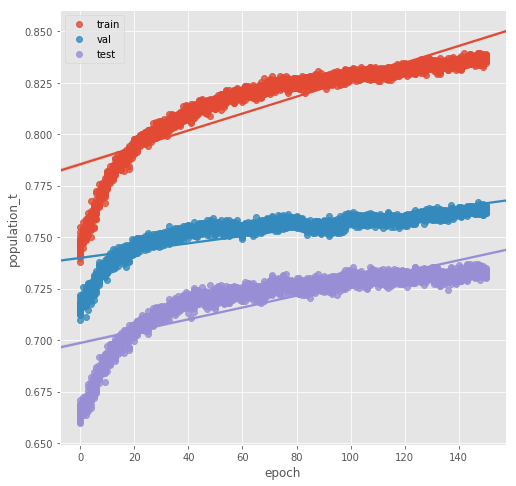

In [7]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

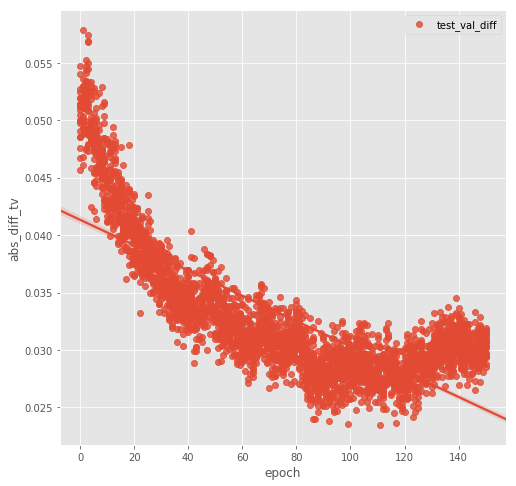

In [8]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

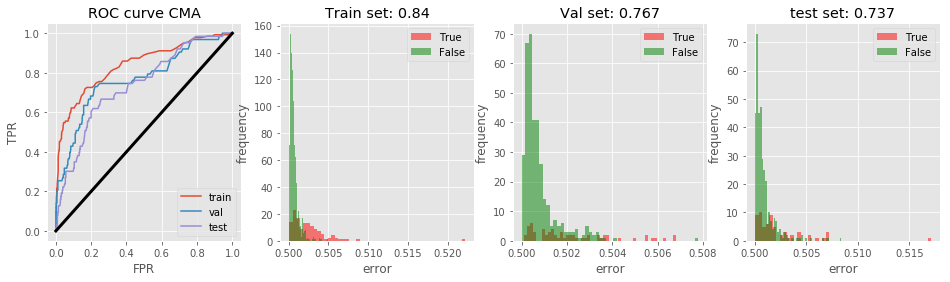

In [9]:
BO_vis.plot_cma(data)

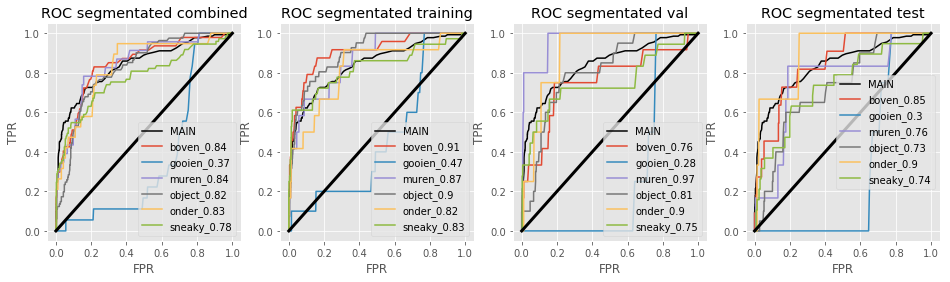

In [10]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

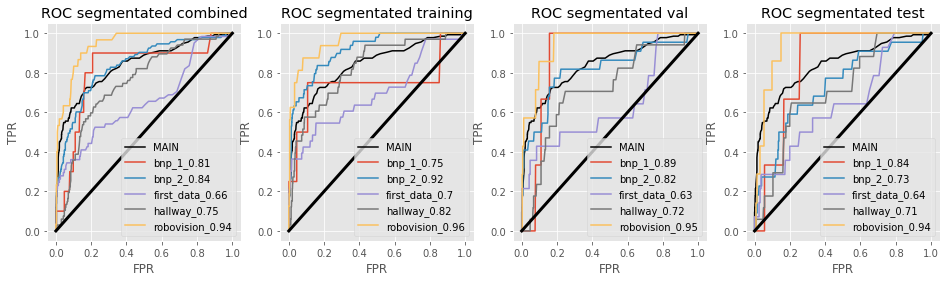

In [11]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus leaky_relu_c_sigmoid

In [4]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu_C_sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/leaky_relu_C_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 362 (seed=768410, Mon May  7 11:20:03 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.511589231888579e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:55.2
    2     42 -7.559713127533521e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:04.6
    3     63 -7.584658559401309e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:12.7
    4     84 -7.628417004469390e-01 1.0e+00 3.99e-01  4e-01  4e-01 1:21.2
    5    105 -7.662024044624605e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:29.9
    6    126 -7.715829955306102e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:37.8
    7    147 -7.761944357828362e-01 1.0e+00 3.87e-01  4e-01  4e-01 1:46.2
    8    168 -7.795412812250979e-01 1.0e+00 3.84e-01  4e-01  4e-01 1:55.0
    9    189 -7.811627342965042e-01 1.0e+00 3.81e-01  4e-01  4e-01 2:03.8
   10    210 -7.851193569622008e-01 1.0e+00 3.78e-01  4e-01  4e-01 2:13.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.902574

  100   2100 -9.175588123202717e-01 1.2e+00 4.61e-01  5e-01  5e-01 21:17.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.196064165194193e-01 1.2e+00 4.62e-01  5e-01  5e-01 22:25.5
  102   2142 -9.207774659598794e-01 1.2e+00 4.64e-01  5e-01  5e-01 22:32.2
  103   2163 -9.196029518761043e-01 1.2e+00 4.66e-01  5e-01  5e-01 22:39.2
  104   2184 -9.196202750926793e-01 1.2e+00 4.67e-01  5e-01  5e-01 22:46.7
  105   2205 -9.205799812909262e-01 1.2e+00 4.68e-01  5e-01  5e-01 22:54.6
  106   2226 -9.203028098257283e-01 1.2e+00 4.69e-01  5e-01  5e-01 23:03.5
  107   2247 -9.207497488133597e-01 1.2e+00 4.70e-01  5e-01  5e-01 23:12.0
  108   2268 -9.200498908637357e-01 1.2e+00 4.71e-01  5e-01  5e-01 23:20.8
  109   2289 -9.195509822263799e-01 1.2e+00 4.72e-01  5e-01  5e-01 23:28.6
  110   2310 -9.203651734053979e-01 1.2e+00 4.72e-01  5e-01  5e-01 23:37.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.216644146485120

In [5]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

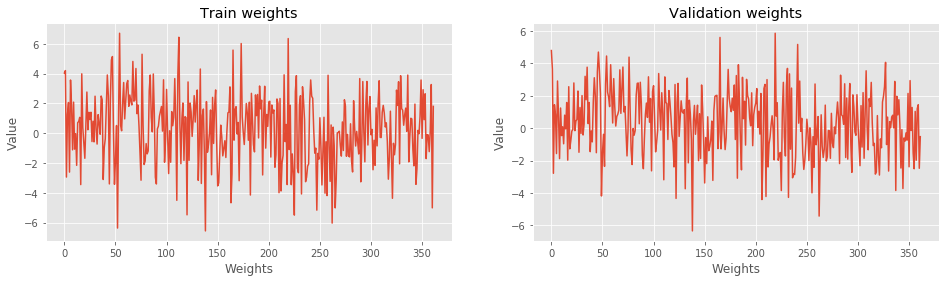

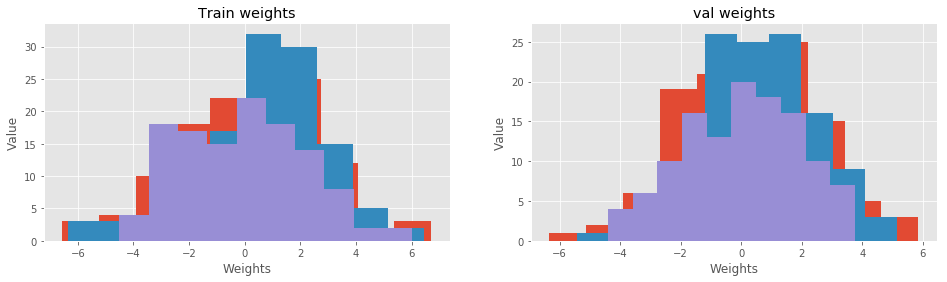

In [6]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

In [13]:
data['x_tr'][1]

4.201630737648199

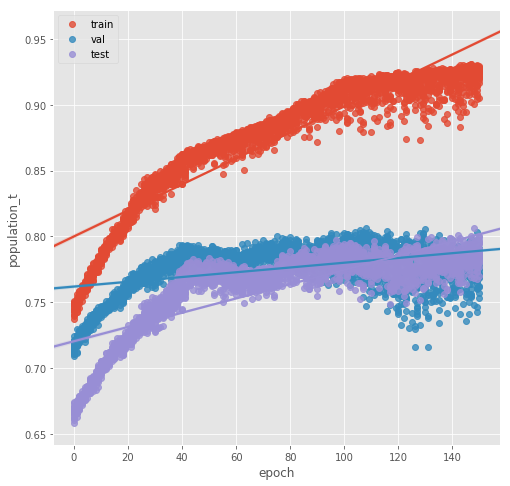

In [7]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

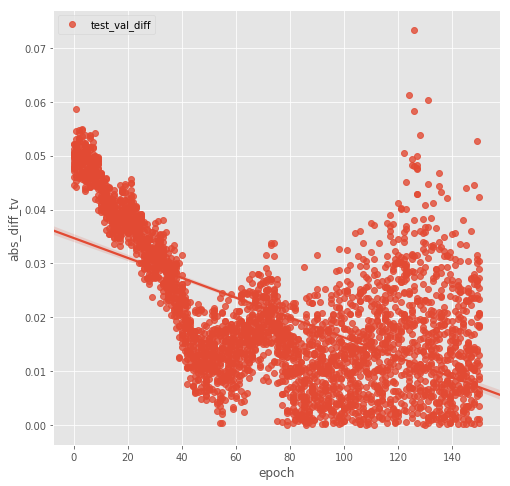

In [8]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

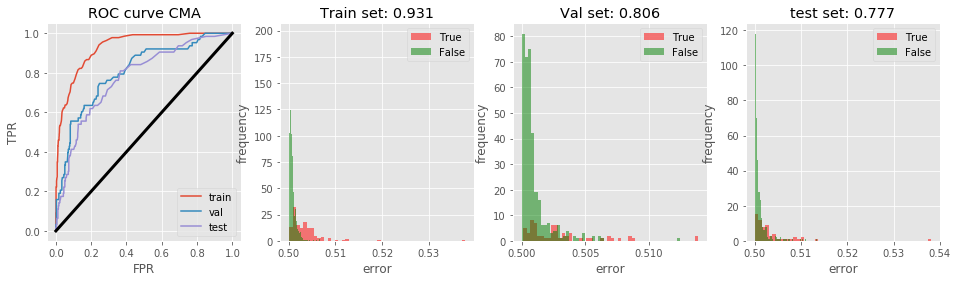

In [9]:
BO_vis.plot_cma(data)

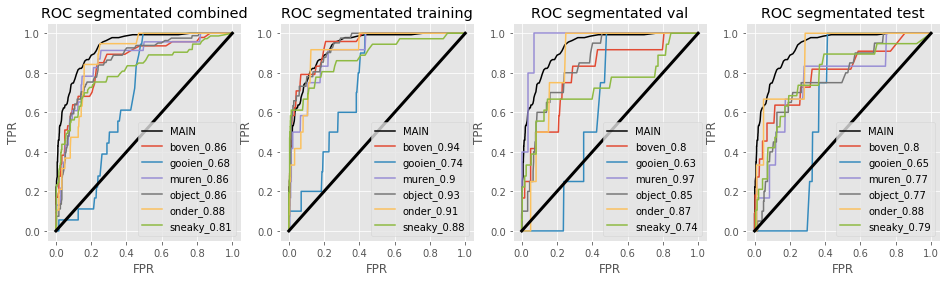

In [10]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

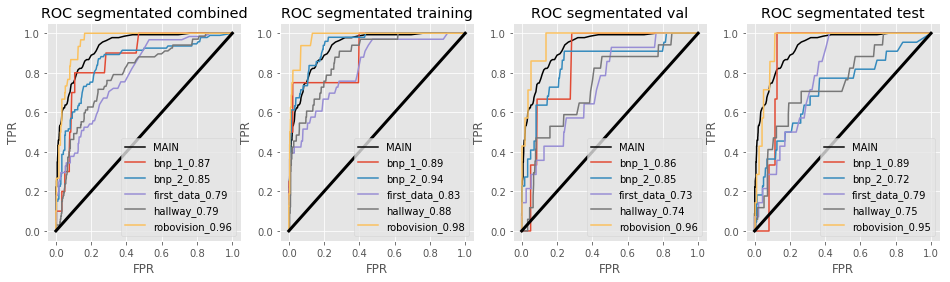

In [11]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)